In [5]:
!pip install arch

In [6]:
# GARCH Volatility Forecasting for S&P 500 Returns

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

In [7]:
# Step 1: Load historical price data
symbol = '^GSPC'  # S&P 500 Index
data = yf.download(symbol, start='2015-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
# Step 2: Select appropriate price column
if 'Adj Close' in data.columns:
    prices = data['Adj Close']
elif 'Close' in data.columns:
    prices = data['Close']
else:
    raise KeyError("Expected 'Adj Close' or 'Close' in downloaded data.")

prices = prices.dropna()

In [9]:
# Step 3: Calculate daily returns (%)
returns = 100 * prices.pct_change().dropna()

<Figure size 1000x400 with 0 Axes>

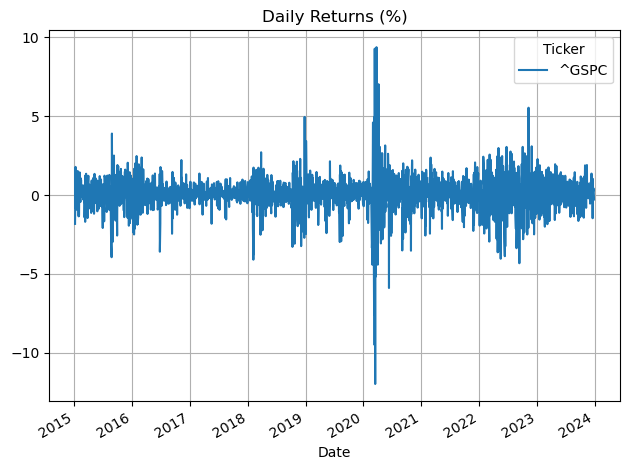

In [15]:
# Step 4: Plot returns
plt.figure(figsize=(10, 4))
returns.plot(title='Daily Returns (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

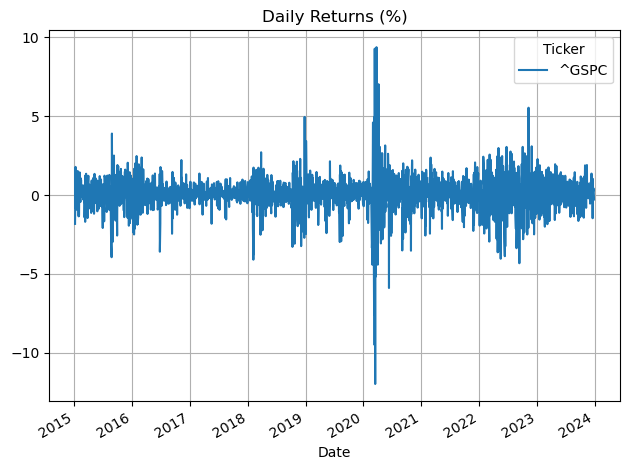

In [16]:
# Assistant
# Step 4: Plot returns
plt.figure(figsize=(10, 4))
returns.plot(title='Daily Returns (%)')
plt.grid(True)
plt.tight_layout()
plt.show()  # Added the missing closing parenthesis here

In [17]:
# Step 5: Fit GARCH(1,1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
res = model.fit(update_freq=10)
print(res.summary())

Iteration:     10,   Func. Count:     64,   Neg. LLF: 2926.7059726074312
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2926.7059726072507
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2926.71
Distribution:                  Normal   AIC:                           5861.41
Method:            Maximum Likelihood   BIC:                           5884.31
                                        No. Observations:                 2263
Date:                Sat, May 24 2025   Df Residuals:                     2262
Time:                        17:57:16   Df Model:                            1
      

In [18]:
# Step 6: Forecast next 10 days of volatility
forecast = res.forecast(horizon=10)
vol_forecast = forecast.variance.values[-1]**0.5  # convert variance to stdev

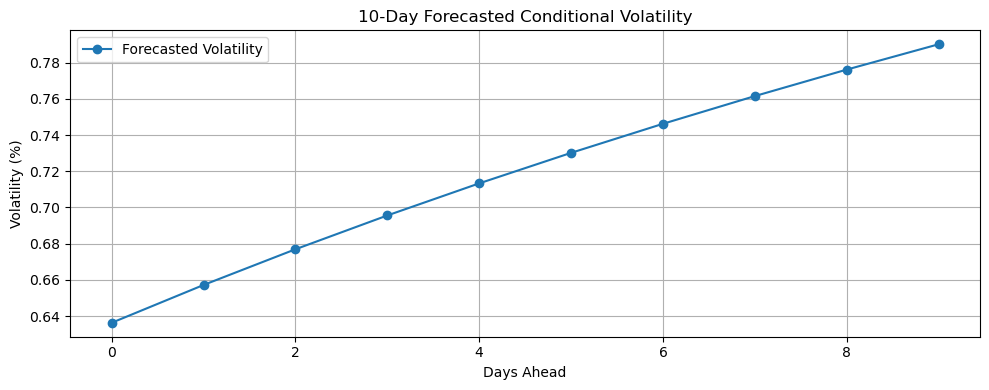

In [19]:
# Step 7: Plot volatility forecast
plt.figure(figsize=(10, 4))
plt.plot(vol_forecast, marker='o', label='Forecasted Volatility')
plt.title('10-Day Forecasted Conditional Volatility')
plt.xlabel('Days Ahead')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("garch_vol_forecast.png")
plt.show()